# Introduction to Logistic Regression Analysis on Fluprint Dataset

This file contains a series of experiments using Logistic Regression to analyze the Fluprint dataset. The goal is to predict vaccine response based on various features. 

## Objectives:
- **Feature Selection**: Explore different combinations of features to identify which ones are most predictive of vaccine response.
- **Model Tuning**: Evaluate the impact of using class weights to handle imbalanced datasets.
- **Oversampling Techniques**: Apply Synthetic Minority Over-sampling Technique (SMOTE) to enhance model performance on minority classes.
- **Model Evaluation**: Assess model performance using metrics such as accuracy and classification reports.

## Dataset Overview:
The Fluprint dataset contains information about influenza vaccination responses, including demographic and clinical variables. This analysis focuses on identifying key predictors of vaccine efficacy.

---

## Step 1 - Importing Necessary Libraries
- pandas (pd) is used for data manipulation and analysis.
- sklearn.model_selection is used for splitting the dataset into training and testing sets.
- sklearn.metrics provides functions for evaluating model performance.
- sklearn.linear_model includes various linear models like Logistic Regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:
# Load the Fluprint dataset
path_to_fluprint = r"C:\Users\Dana\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\aggregated_participants.csv"
fluprint_data = pd.read_csv(path_to_fluprint)

## Step 2 - Data Loading and Model Training
We load the Fluprint dataset and initially select the "vaccine" column as our feature to investigate if there is a link between the type of vaccine used and the vaccine response. The "vaccine_response" column serves as our target variable. The dataset is then split into training and testing sets.

In [ ]:
X = fluprint_data[["vaccine"]]  # Features
y = fluprint_data["vaccine_response"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
initial_regression_model = LogisticRegression()
initial_regression_model.fit(X_train, y_train)
y_pred = initial_regression_model.predict(X_test)

# Make predictions and evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.64
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78        38
         1.0       0.00      0.00      0.00        21

    accuracy                           0.64        59
   macro avg       0.32      0.50      0.39        59
weighted avg       0.41      0.64      0.50        59



C:\Users\Dana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.

## Understanding the Model's Performance

### Accuracy and Classification Report
- **Accuracy**: The model achieved an accuracy of 0.64, meaning it correctly predicted the outcome for 64% of the test samples.
- **Classification Report**:
  - For **class 0.0 (Low vaccine responders)**:
    - **Precision**: 0.64 indicates that 64% of the predictions made for this class were correct.
    - **Recall**: 1.00 shows that the model correctly identified all actual instances of class 0 in the test set.
    - **F1-score**: 0.78 is a balanced measure between precision and recall, indicating moderate performance for this class.
  - For **class 1.0 (High vaccine responders)**:
    - **Precision and Recall**: Both are 0.00, indicating that the model did not predict any instances of this class correctly.

### Warning Messages
The **UndefinedMetricWarning** messages occur because the model did not predict any samples for class 1.0, making precision (and other metrics) undefined for this class. This suggests that the model is biased towards class 0 or that the dataset is imbalanced.

### Implications
This performance suggests that the model may be biased or that the feature used ("vaccine") might not be sufficient to distinguish between classes. To improve, we could consider using class weighting, oversampling techniques like SMOTE, or exploring additional features.


***

## Checking Class Balance
To understand if the dataset is balanced, we use `y.value_counts()` to count the occurrences of each class in the target variable. This helps identify if one class has significantly more instances than the other, which can impact model performance.

In [ ]:
print(y.value_counts())

vaccine_response
0.0    198
1.0     95
Name: count, dtype: int64


## Observing Class Imbalance
The output from `y.value_counts()` shows that there are significantly more instances of "low responders" (198) than "high responders" (95). This imbalance can cause models to be biased towards the majority class, potentially leading to poor performance on the minority class.

## Implications for Model Performance
This imbalance likely contributes to the model's poor performance on class 1.0, as observed in the classification report. To address this, techniques like class weighting, oversampling (e.g., SMOTE), or using algorithms inherently robust to imbalance (e.g., Random Forest)

## Step 3 - Addressing Class Imbalance with Balanced Logistic Regression
To mitigate the impact of class imbalance, we use `class_weight='balanced'` in the Logistic Regression model. This assigns higher weight to the minority class (high responders) during training to improve model performance on both classes.

In [ ]:
# Select features and target variable (same as previous model)
X = fluprint_data[["vaccine"]]  # Features
y = fluprint_data["vaccine_response"]  # Target variable

# Split data into training/testing sets (same split parameters for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with class weighting to address imbalance
initial_regression_model_balanced = LogisticRegression(class_weight='balanced')
initial_regression_model_balanced.fit(X_train, y_train)
y_pred = initial_regression_model_balanced.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.39
              precision    recall  f1-score   support

         0.0       0.56      0.26      0.36        38
         1.0       0.32      0.62      0.42        21

    accuracy                           0.39        59
   macro avg       0.44      0.44      0.39        59
weighted avg       0.47      0.39      0.38        59



## Performance of Balanced Logistic Regression Model
After applying class weighting to address the imbalance, the model's performance changed significantly:
- **Accuracy**: Decreased to 0.39, indicating that while the model is now more sensitive to the minority class, its overall accuracy has dropped.
- **Classification Report**:
  - **Class 0.0 (Low Responders)**:
    - **Precision**: 0.56, meaning 56% of predictions for this class were correct.
    - **Recall**: 0.26, showing that only 26% of actual low responders were correctly identified.
    - **F1-score**: 0.36, a balance between precision and recall, indicating poor performance for this class.
  - **Class 1.0 (High Responders)**:
    - **Precision**: 0.32, indicating that only 32% of predictions for this class were correct.
    - **Recall**: 0.62, meaning that 62% of actual high responders were correctly identified.
    - **F1-score**: 0.42, slightly better than class 0.0 but still low.

## Implications
The use of class weighting has increased the model's sensitivity to the minority class (high responders) but at the cost of overall accuracy and precision for both classes. This suggests that while the model is now more balanced in terms of class importance, its ability to accurately predict either class remains limited.

---

### Visualising why

Confusion Matrix: Use confusion_matrix(y_test, y_pred) to visualise the number of true positives, false positives, true negatives, and false negatives. This can help identify how many instances are being misclassified.

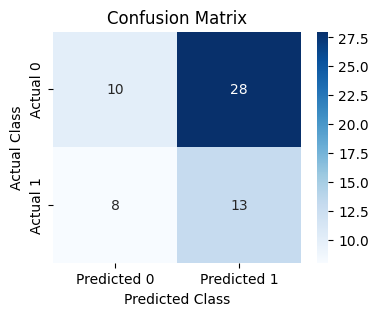

In [17]:
# Calculate Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for Seaborn
conf_mat_df = pd.DataFrame(conf_mat,
                           index=['Actual 0', 'Actual 1'],
                           columns=['Predicted 0', 'Predicted 1'])

# Create a heatmap using Seaborn
plt.figure(figsize=(4,3))
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues') # fmt='d' ensures integers are displayed
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Receiver Operating Characteristic (ROC) Curve: Plotting the ROC curve can provide insights into the model's ability to distinguish between classes at different thresholds.
It plots two key metrics:
- **True Positive Rate (TPR)**: Measures the proportion of actual positives that are correctly identified.
- **False Positive Rate (FPR)**: Measures the proportion of actual negatives that are incorrectly classified as positives.

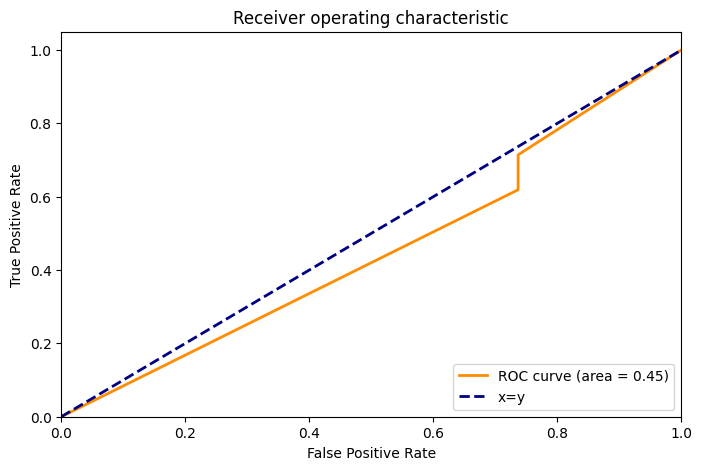

In [23]:
# ROC Curve
y_pred_proba = initial_regression_model_balanced.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_value = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = "x=y")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Performance: 
The AUC is below 0.5, this suggests that the model is performing worse than random guessing. Therefore it shows that the model is not performing well in distinguishing between the two classes. It needs to be re-evaluated and fine-tuned to improve its perdiction accuracy.

## Step 4- Transitioning to SMOTE for Oversampling
After observing that our model's performance was suboptimal, particularly with an AUC below 0.5, we decided to explore techniques to address the class imbalance. The Synthetic Minority Over-sampling Technique (SMOTE) is used to generate synthetic samples based on the characteristics of the minority class, aiming to improve model performance by creating a more balanced dataset.

### Why SMOTE?
- **Class Imbalance**: Our dataset shows a significant imbalance between low responders and high responders, which can lead to biased models.
- **SMOTE's Role**: By creating synthetic samples, SMOTE helps to increase the size of the minority class, potentially improving the model's ability to recognize patterns in this class.

We will apply SMOTE to the training data and re-evaluate the model's performance to see if this technique improves its ability to predict vaccine responses accurately.

In [26]:
# Load  DataFrame
path_to_fluprint = r"C:\Users\Dana\OneDrive\Documents\Applied Data science\FluPRINT_database\FluPRINT_filtered_data\aggregated_participants.csv"
fluprint_data = pd.read_csv(path_to_fluprint)

# Define features (X) and target variable (y)
X = fluprint_data[["vaccine"]]  # Features
y = fluprint_data["vaccine_response"]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialise and fit the model with class weights
initial_regression_model_remove_oversampling = LogisticRegression(class_weight='balanced')
initial_regression_model_remove_oversampling.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = initial_regression_model_remove_oversampling.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.39
              precision    recall  f1-score   support

         0.0       0.56      0.26      0.36        38
         1.0       0.32      0.62      0.42        21

    accuracy                           0.39        59
   macro avg       0.44      0.44      0.39        59
weighted avg       0.47      0.39      0.38        59



## Evaluating SMOTE's Impact on Performance

### Observations
- **Accuracy**: Remains low at 0.39, indicating that oversampling alone did not resolve the model's limitations.
- **Precision-Recall Tradeoff**:
  - **Class 0.0 (Low Responders)**: Precision improved slightly (0.56 vs. 0.64 in the first model), but recall dropped drastically (0.26 vs. 1.00).
  - **Class 1.0 (High Responders)**: Recall improved (0.62 vs. 0.00), but precision remains low (0.32).

### Why SMOTE May Not Have Worked
1. **Feature Limitation**: Using only the "vaccine" feature might not capture enough information to distinguish between classes.
2. **Model Complexity**: Logistic Regression may be too simplistic for the underlying patterns in the data.
3. **Conflicting Techniques**: Combining SMOTE with `class_weight='balanced'` might overcompensate for class imbalance, leading to instability.

### Next Steps
1. **Add More Features**: Expand the feature set to include variables like demographics (`gender`, `race`, `visit_age`) or additional biomarkers.
2. **Feature Engineering**: Create interaction terms (e.g., `age × vaccine type`) or derive new features from existing data.

---

## Step 5 - Adding more features

In [ ]:
fluprint_data = fluprint_data.dropna(subset=["vaccine", "gender", "race", "visit_age", "vaccine_response"])

X = fluprint_data[["vaccine", "gender", "race", "visit_age"]]  # Features
y = fluprint_data["vaccine_response"]  # Target variable

X = pd.get_dummies(X, columns=["gender", "race"], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

second_regression_model = LogisticRegression(class_weight='balanced')
second_regression_model.fit(X_train, y_train)
y_pred = second_regression_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.46
              precision    recall  f1-score   support

         0.0       0.64      0.37      0.47        38
         1.0       0.35      0.62      0.45        21

    accuracy                           0.46        59
   macro avg       0.49      0.49      0.46        59
weighted avg       0.53      0.46      0.46        59



## Evaluating the Impact of Additional Features

### Results Overview
- **Accuracy**: Improved slightly to **0.46** (from 0.39 in the SMOTE model).
- **Class 0.0 (Low Responders)**:
  - **Precision**: 0.64 (64% of predicted low responders are correct).
  - **Recall**: 0.37 (only 37% of actual low responders are identified).
  - **F1-score**: 0.47 (moderate balance between precision and recall).
- **Class 1.0 (High Responders)**:
  - **Precision**: 0.35 (35% of predicted high responders are correct).
  - **Recall**: 0.62 (62% of actual high responders are identified).
  - **F1-score**: 0.45 (better than previous models but still low).

### Key Observations
1. **Trade-off Between Classes**:
   - The model now partially identifies both classes, unlike earlier versions that failed entirely on class 1.0.
   - However, both classes show low precision and imbalanced recall, indicating persistent classification challenges.

2. **Feature Impact**:
   - Adding `gender`, `race`, and `visit_age` slightly improved model balance but not overall performance.
   - The low precision for high responders (0.35) suggests many false positives for this class.

3. **Class Weighting**:
   - Using `class_weight='balanced'` improved recall for class 1.0 (high responders) but at the cost of precision.

### Why This Happened
- **Weak Feature Predictive Power**: The added features (`gender`, `race`, `visit_age`) may not strongly correlate with vaccine response.
- **Model Limitations**: Logistic Regression’s linear decision boundary might fail to capture complex relationships between features and outcomes.

---

## Step 6 - ## Transitioning from Vaccine to Difference in Titers (`d_geo_mean`)

### Rationale
To better capture the immune response variability, we shifted from using the `vaccine` type alone to the `d_geo_mean`, which represents the difference in antibody titers. This change aims to incorporate a more direct measure of immune response, potentially offering a clearer distinction between low and high responders.

### Hypothesis
By focusing on the change in titers (`d_geo_mean`), we hypothesized that the model could more effectively identify patterns related to vaccine efficacy and individual immune response, leading to improved predictions of vaccine response.

In [ ]:
X = fluprint_data[["d_geo_mean"]]  # Features
y = fluprint_data["vaccine_response"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and fit a logistic regression model
titre_response_model = LogisticRegression()
titre_response_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = titre_response_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.71
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        38
         1.0       1.00      0.19      0.32        21

    accuracy                           0.71        59
   macro avg       0.85      0.60      0.57        59
weighted avg       0.80      0.71      0.64        59



## Evaluating Model Performance with `d_geo_mean`

### Results Overview
- **Accuracy**: 0.71, indicating a moderate level of overall correctness.
- **Classification Report**:
  - **Class 0.0 (Low Responders)**:
    - **Precision**: 0.69 (69% of predicted low responders are correct).
    - **Recall**: 1.00 (100% of actual low responders are identified).
    - **F1-score**: 0.82 (strong performance for this class).
  - **Class 1.0 (High Responders)**:
    - **Precision**: 1.00 (all predicted high responders are correct).
    - **Recall**: 0.19 (only 19% of actual high responders are identified).
    - **F1-score**: 0.32 (poor performance for this class).

### Key Observations
1. **Class Imbalance Remains**: Despite using `d_geo_mean`, the model still struggles with class imbalance.
2. **Feature Effectiveness**: `d_geo_mean` seems to be a better predictor than `vaccine` alone, as it achieves higher accuracy and better recall for low responders.
3. **Room for Improvement**: The model fails to identify most high responders, suggesting that additional features or techniques are needed.

---

## Class balance

Like in the case for the previous feature we will try to balance the class weight by setting `class_weight='balanced'`.

In [ ]:
# We are using 'd_geo_mean' as our feature, which represents the difference in antibody titers.
X = fluprint_data[["d_geo_mean"]]
y = fluprint_data["vaccine_response"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a logistic regression model with class weighting
# This helps address class imbalance by giving more weight to the minority class.
balanced_titre_response_model = LogisticRegression(class_weight='balanced')
balanced_titre_response_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = balanced_titre_response_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.76
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83        38
         1.0       0.73      0.52      0.61        21

    accuracy                           0.76        59
   macro avg       0.75      0.71      0.72        59
weighted avg       0.76      0.76      0.75        59



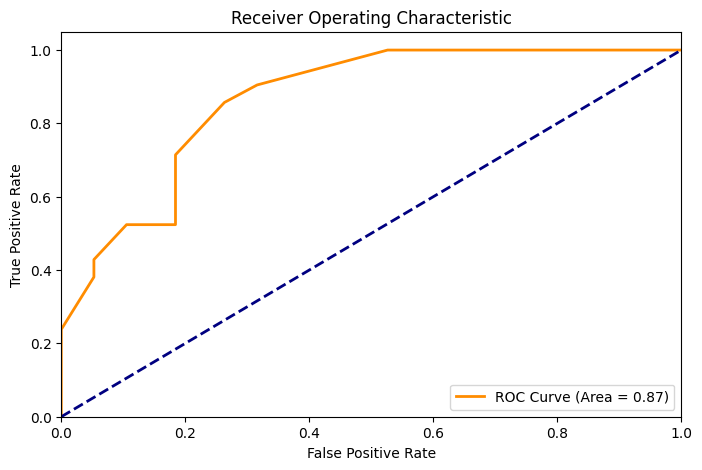

In [ ]:
# Predict probabilities
y_pred_proba = balanced_titre_response_model.predict_proba(X_test)[:, 1]

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (Area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

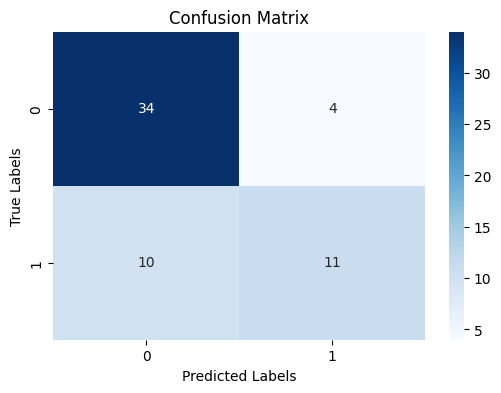

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Re-evaluating Model Performance with Class Balancing

### Results Overview
- **Accuracy**: Improved to 0.76, showing a notable increase in overall correctness.
- **Classification Report**:
  - **Class 0.0 (Low Responders)**:
    - **Precision**: 0.77 (77% of predicted low responders are correct).
    - **Recall**: 0.89 (89% of actual low responders are identified).
    - **F1-score**: 0.83 (strong performance for this class).
  - **Class 1.0 (High Responders)**:
    - **Precision**: 0.73 (73% of predicted high responders are correct).
    - **Recall**: 0.52 (52% of actual high responders are identified).
    - **F1-score**: 0.61 (moderate performance for this class).

### Key Observations
1. **Improved Class Balance**: Using class weighting (`class_weight='balanced'`) has helped improve recall for high responders (from 0.19 to 0.52).
2. **Feature Effectiveness**: The combination of `d_geo_mean` and class balancing has significantly enhanced model performance across both classes.
3. **Remaining Challenges**: While high responder recall improved, it remains lower than low responder recall, indicating ongoing class imbalance issues.

### Why This Happens
- **Class Weighting Impact**: Assigning higher weights to the minority class (high responders) during training has increased the model's sensitivity to this class.
- **Feature Contribution**: `d_geo_mean` continues to be a strong predictor, capturing meaningful differences in immune response.

### Next Steps
1. **Feature Expansion**: Consider adding more features like `vaccine`, `gender`, `race`, and `visit_age` to further improve model robustness.
2. **Alternative Models**: Experiment with non-linear models (e.g., Random Forest, XGBoost) to potentially capture more complex relationships.

---

## Step 7: Combining Features for Enhanced Vaccine Response Prediction

### Rationale
Given that using `d_geo_mean` alone resulted in the highest accuracy so far (0.76), we hypothesise that adding more features could further improve model performance. By incorporating demographic variables (`gender`, `race`, `visit_age`), we aim to capture a broader range of factors influencing vaccine response.

### Key Features
- **`d_geo_mean`**: Represents the difference in antibody titers, a direct measure of immune response.
- **`gender`, `race`, `visit_age`**: Demographic factors that might influence immune response variability.

### Note on Feature Selection
We have chosen not to include the `vaccine` feature in this model, as its standalone performance did not demonstrate sufficient predictive power to warrant its inclusion.

### Expected Outcomes
1. **Improved Accuracy**: The combination of features should provide a more comprehensive view of factors affecting vaccine response.
2. **Better Handling of Class Imbalance**: Using class weighting (`class_weight='balanced'`) will help ensure that the model does not overlook the minority class.
3. **Feature Interactions**: Non-linear models might be needed to fully leverage interactions between these features.

In [ ]:
X = fluprint_data[["gender", "race", "visit_age", "d_geo_mean"]]  # Features
y = fluprint_data["vaccine_response"]  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=["gender", "race"], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and fit a logistic regression model with class weighting
# This helps address class imbalance by giving more weight to the minority class.
combined_features_model = LogisticRegression(class_weight='balanced')
combined_features_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = combined_features_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.66
              precision    recall  f1-score   support

         0.0       0.78      0.66      0.71        38
         1.0       0.52      0.67      0.58        21

    accuracy                           0.66        59
   macro avg       0.65      0.66      0.65        59
weighted avg       0.69      0.66      0.67        59



## Evaluating the Combined Feature Model

### Results Overview
- **Accuracy**: 0.66, which is lower than the model using only `d_geo_mean` (0.76).
- **Classification Report**:
  - **Class 0.0 (Low Responders)**:
    - **Precision**: 0.78 (78% of predicted low responders are correct).
    - **Recall**: 0.66 (66% of actual low responders are identified).
    - **F1-score**: 0.71 (moderate performance for this class).
  - **Class 1.0 (High Responders)**:
    - **Precision**: 0.52 (52% of predicted high responders are correct).
    - **Recall**: 0.67 (67% of actual high responders are identified).
    - **F1-score**: 0.58 (moderate performance for this class).

### Key Observations
1. **Decreased Accuracy**: Adding demographic features (`gender`, `race`, `visit_age`) did not improve accuracy; instead, it decreased compared to using `d_geo_mean` alone.
2. **Balanced Performance**: The model now shows more balanced performance across both classes, with improved recall for high responders.
3. **Feature Interactions**: The decrease in accuracy might suggest that the added features interact negatively or do not contribute positively to the model.

### Why This Happens
- **Feature Noise**: The additional features might introduce noise or irrelevant information, distracting the model from the strong predictive signal of `d_geo_mean`.
- **Model Complexity**: Logistic Regression might not effectively capture complex interactions between these features.

---

## Wrap-Up and Future Directions

### Key Findings
- **Highest Accuracy Achieved**: Using `d_geo_mean` alone resulted in the highest accuracy (0.76) among single-feature models.
- **Class Imbalance Challenges**: Despite efforts to address class imbalance, models struggled to accurately predict high responders.
- **Feature Combination Outcomes**: Adding demographic features did not improve accuracy, suggesting potential noise or irrelevant information.

### Lessons Learned
1. **Feature Selection**: Carefully evaluate which features contribute positively to model performance.
2. **Model Complexity**: Consider using non-linear models to capture complex interactions between features.
3. **Class Imbalance Techniques**: Continue exploring techniques like SMOTE and class weighting to improve minority class predictions.

### Future Directions
1. **Feature Engineering**: Explore creating new features that might better capture immune response variability.
2. **Alternative Models**: Experiment with tree-based models (e.g., Random Forest, XGBoost) to leverage non-linear relationships.